In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline

<center><h1><b>The Fourier Transform</b></h1></center>
<center><h3>Applications for the Practictioners Challenge</h3></center>

To put it very simply, the Fourier Transform is a mathematical way to take waves or wave-like curves in time domain (a.k.a plotted over time) and convert them into frequency domain (a.k.a. show all the basic curvers that make up the complex curve). This transformation is done using the following formula for continuous time
$$
\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-i 2\pi \xi x}dx, \qquad \forall \xi \in \R
$$
Where $\xi$ represents frequency, $x$ is the time domain, $f(x)$ represents the compunded wave curve (such as audio), and $\hat{f}(\xi)$ is the transformed wave curve in the frequency domain. 

In discrete time, this equation becomes
$$
\hat{f}(\xi _k) = \sum_{n=0}^{N-1}f(x_n)e^{-i 2\pi \xi_k x_n}
$$
Given the samples are equally spaced with spacing $\Delta x$
$$
x_n = n\Delta x \qquad \text{and} \qquad \xi_k = \frac{k}{N \Delta x}
$$
Where in this case $\xi_n$ represents discrete frequency and $x_n$ represents discrete time. 

Simplifying this eqaution further, we can get
$$
\hat{f}(\xi _k) = \sum_{n=0}^{N-1} f(x_n) [\cos(2\pi \xi_k x_n) - i\sin(2\pi \xi_k x_n)]
$$
To understand what is going on in the equation, I recommend the 3Blue1Brown video on the Fourier Transform.

<h3>A visual example</h3>
Consider a random wave function
<center><b><span style="color:blue">a</span></b>cos(<span style="color:red">b</span></b>x)</center>
<center><b><span style="color:blue">a</span></b>sin(<span style="color:red">b</span></b>x)</center>
In this case the <span style="color:blue">a</span></b> is considered the amplitude of the wave, and the <span style="color:red">b</span></b> is considered the angular frequency. This is because the <span style="color:blue">a</span></b> changes the wave height, and the <span style="color:red">b</span></b> changes how fast the wave moves per period. The period is what then determines frequency 

For an example, take a look at the graphs below, the three plots are
$$
\cos(x) \\
4\cos(x) \\
\cos(2x)
$$

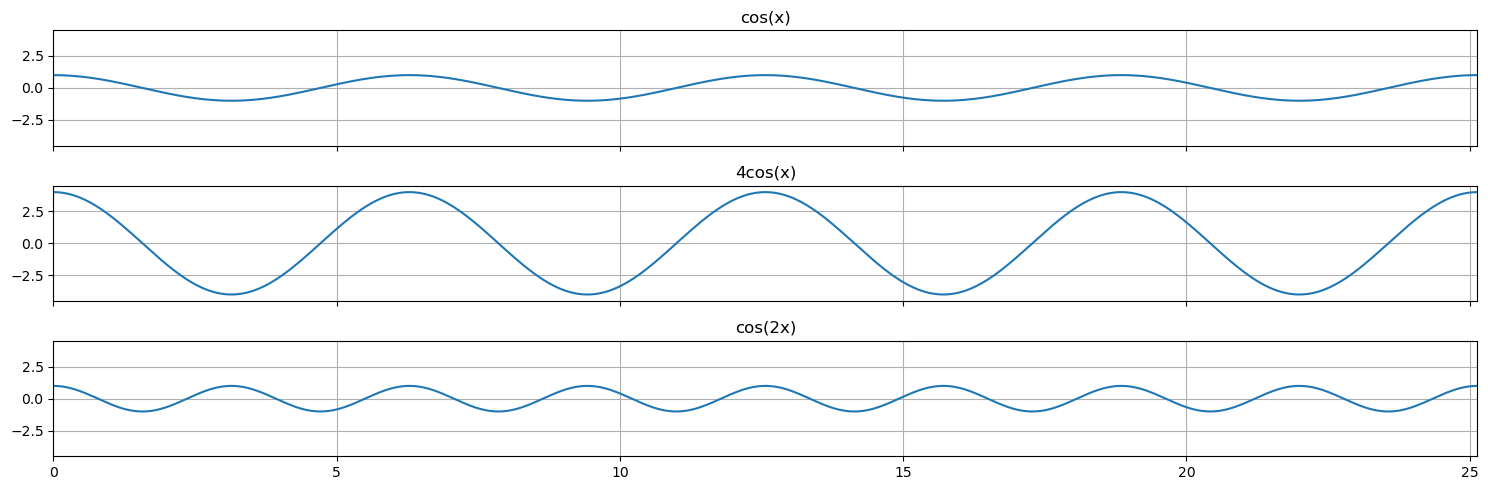

In [11]:
x = np.linspace(0, 8*np.pi, 1000)

# Create y values
y1 = np.cos(x)
y2 = 4 * np.cos(x)
y3 = np.cos(2 * x)

# Create stacked subplots with shared axes
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15, 5))

# Plot each graph
axs[0].plot(x, y1)
axs[0].set_title("cos(x)")

axs[1].plot(x, y2)
axs[1].set_title("4cos(x)")

axs[2].plot(x, y3)
axs[2].set_title("cos(2x)")

# Set same axis limits manually for clarity
axs[0].set_xlim(0, 8*np.pi)
axs[0].set_ylim(-4.5, 4.5)

# Add grid to each subplot
for ax in axs:
    ax.grid(True)

plt.tight_layout()
plt.show()


Waves that move faster in between periods (The amount of time it takes for one complete cycle of the wave to occur) are said to have higher frequencies. Waves that are stronger/taller are said to have more intensity or more amplitude. Now what would happen if we take a bunch of different waves of different amplitudes and frequencies, and added them all together to create a very complex wave? We would get something like as shown in the graph below. The combined wave equations are 
$$
\cos(x) \\
4\cos(2x) \\
1.5\sin(4x) \\
7\sin(\frac{x}{2}) \\
\frac{\cos(7x)}{2} \\
\cos(6x)
$$

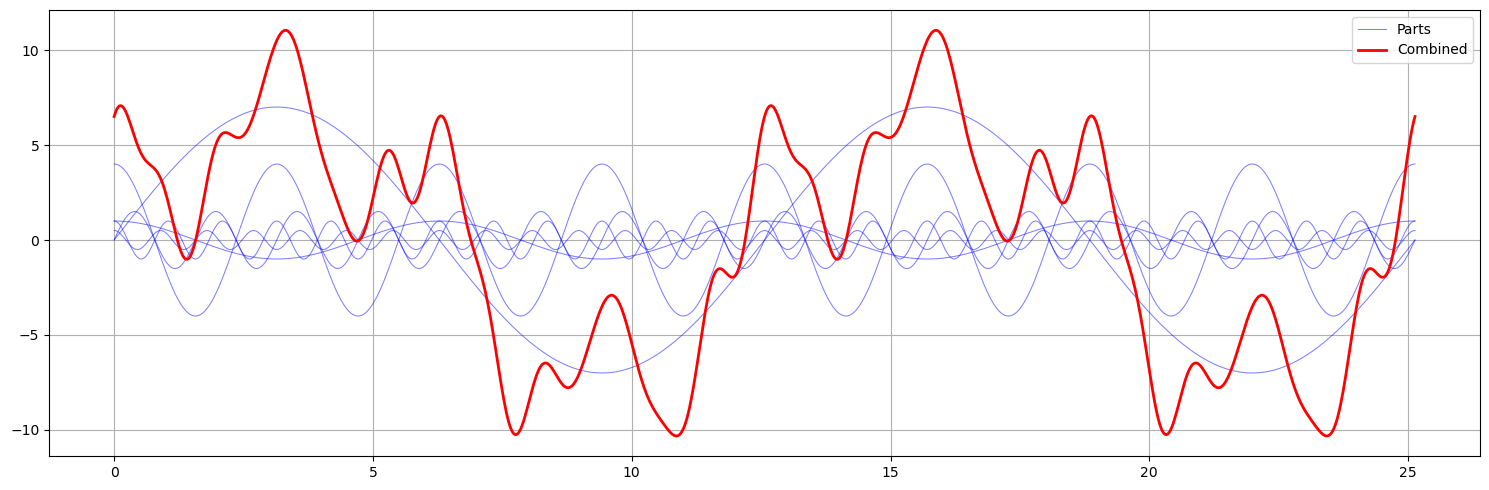

In [20]:
x = np.linspace(0, 8*np.pi, 1000)

y1 = np.cos(x)
y2 = 4*np.cos(2*x)
y3 = 1.5 * np.sin(4*x)
y4 = 7*np.sin(0.5 * x)
y5 = 0.5 * np.cos(7 * x)
y6 = np.cos(6*x)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x,y1, label = "Parts", alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y2, alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y3, alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y4, alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y5, alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y6, alpha=0.5, color="blue", linewidth=0.75)
ax.plot(x,y1 + y2 + y3 + y4 + y5 + y6, label = "Combined", alpha=1, color="red", linewidth=2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



Now take another look at the combined wave equation given. Looking at the line without knowing what the underlying waves that make up it would make it seem impossible to decompose into frequencies and amplitudes. However, decompoisng the wave is very important if we want to know its behavior. 

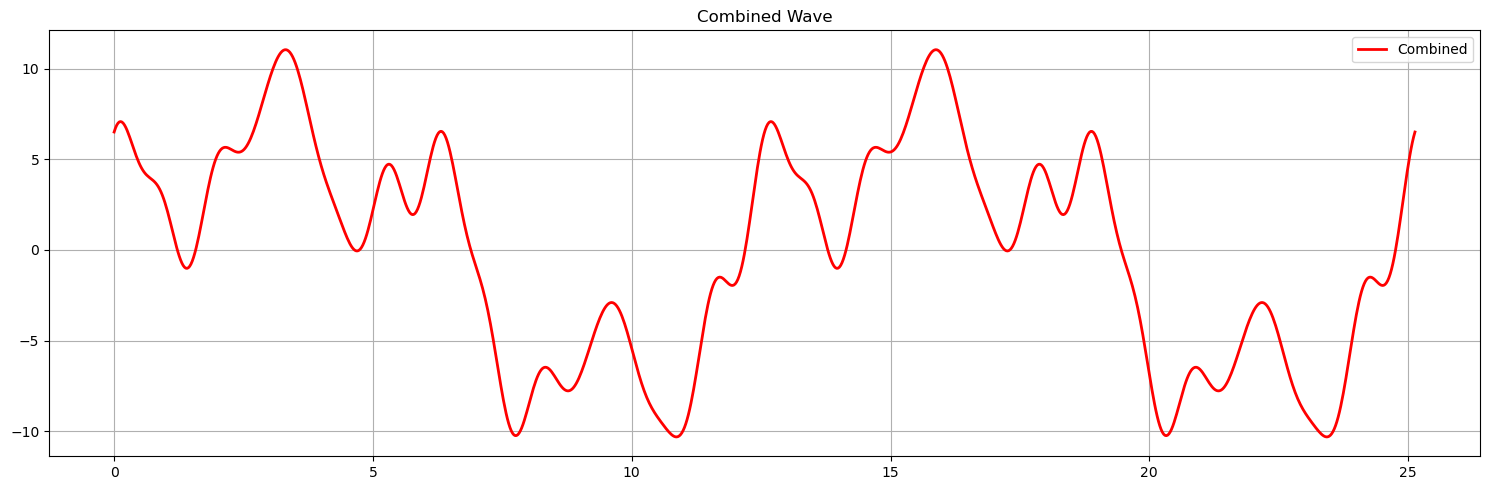

In [21]:
combined = y1 + y2 + y3 + y4 + y5 + y6
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x, combined, label = "Combined", alpha=1, color="red", linewidth=2)
plt.title("Combined Wave")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

To decompose the combined wave into the frequencies, this is what the Fourier transform is used for. We can see it in action below. It is important to note that the frequencies are not the same as the cos and sin waves. The cos and sin waves lie within the time domain however their behavior has frequency to it. 

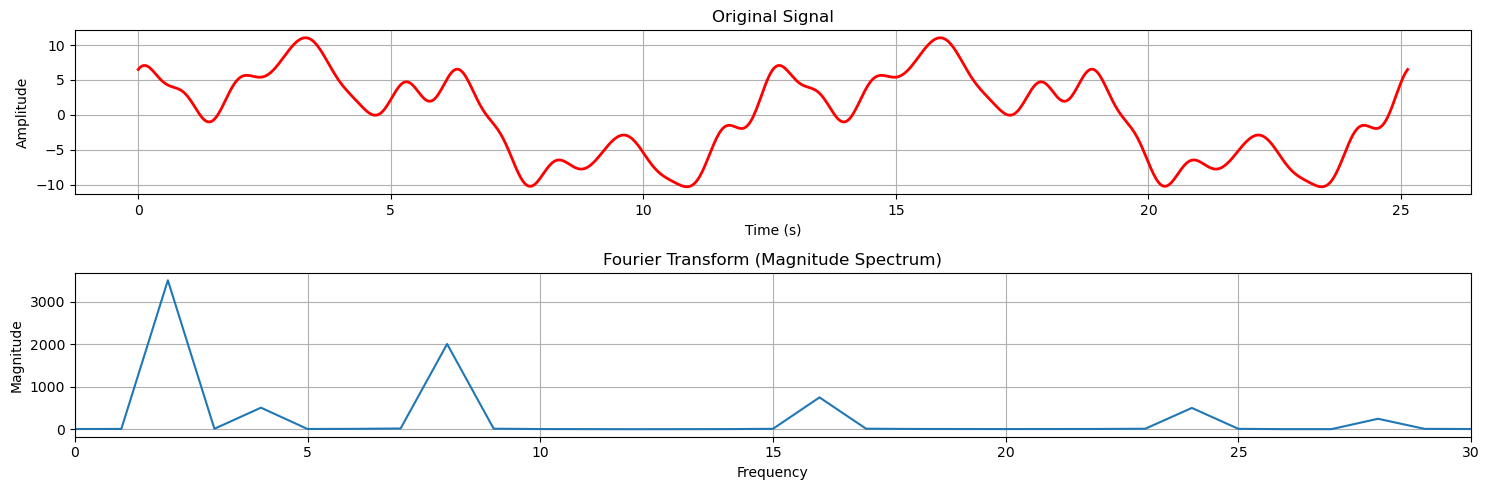

In [27]:
# ----- 2. Compute Fourier Transform -----
fft_vals = np.fft.fft(combined)
fft_freqs = np.fft.fftfreq(len(combined), 1/1000)

# Only keep positive frequencies
positive_freqs = fft_freqs[:len(fft_freqs)//2]
positive_magnitude = np.abs(fft_vals[:len(fft_vals)//2])

# ----- 3. Plot stacked graphs -----
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

# Original signal
ax[0].plot(x, combined, color="red", linewidth=2)
ax[0].set_title("Original Signal")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

# Fourier Transform (magnitude spectrum)
ax[1].set_xlim(0, 30)
ax[1].plot(positive_freqs, positive_magnitude)
ax[1].set_title("Fourier Transform (Magnitude Spectrum)")
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Magnitude")
ax[1].grid(True)

plt.tight_layout()
plt.show()

Now take a look at all the waves presented by the frequency graph above. Each wave consists of different consistent behavior with different periods and magnitude. Notice the different y values regresenting the different magnitudes of each frequency graph that goes into the original signal. 

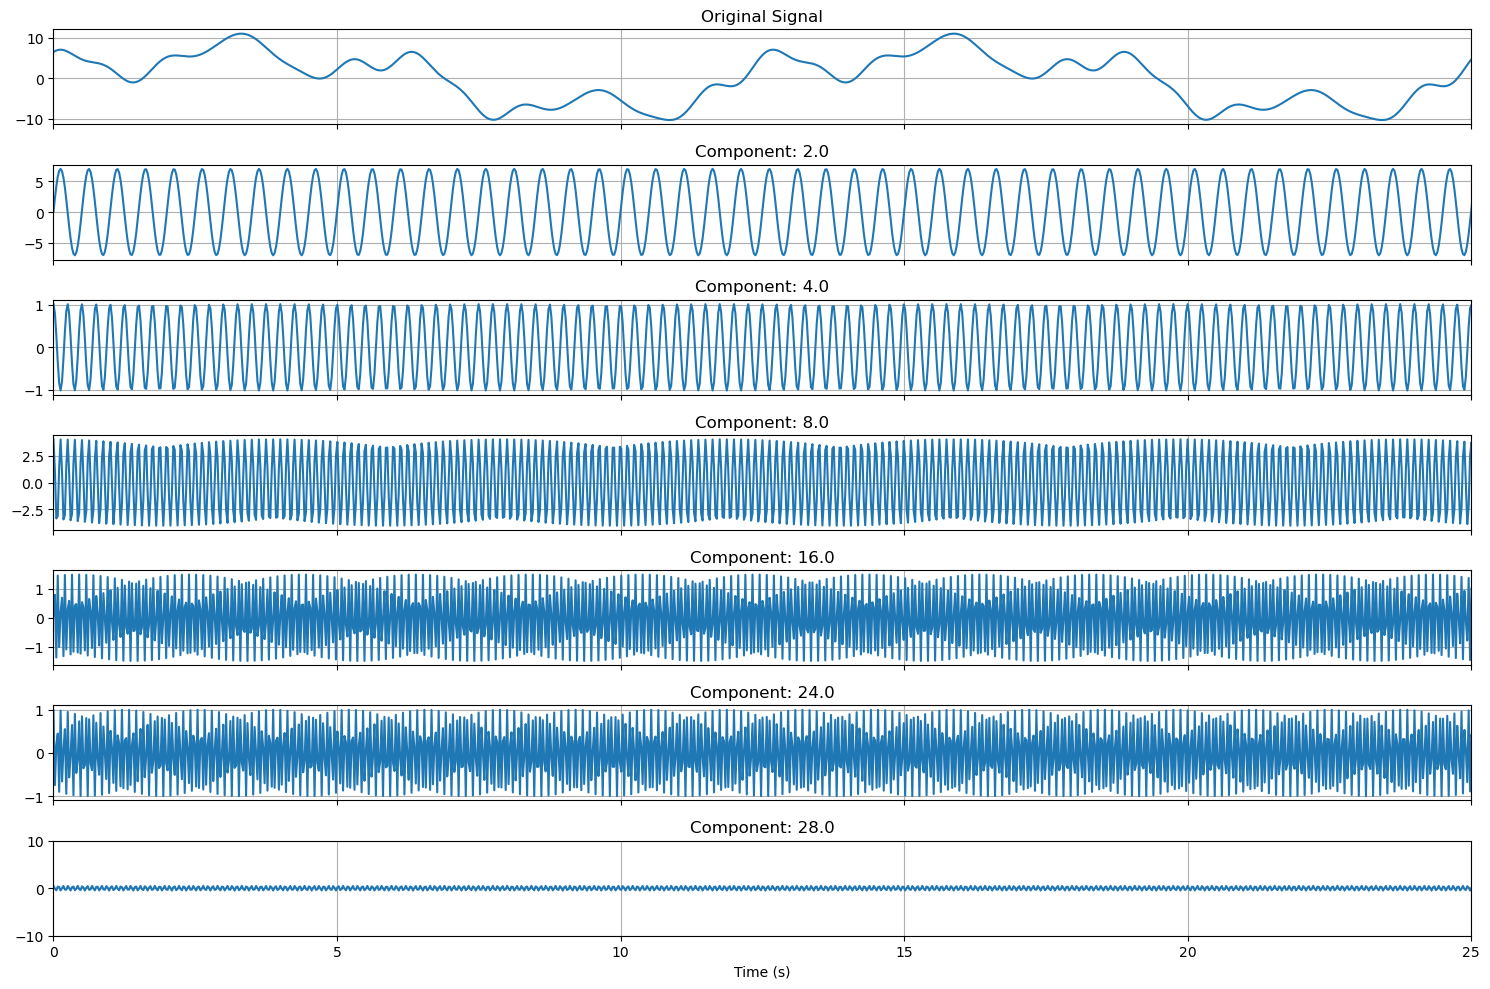

In [38]:
fft_vals = np.fft.fft(combined)
freqs = np.fft.fftfreq(len(combined), 1/1000)

mask = freqs > 0
freqs = freqs[mask]
fft_vals = fft_vals[mask]

N = len(combined)

amplitudes = 2 * np.abs(fft_vals) / N
phases = np.angle(fft_vals)

threshold = 0.1  # ignore very small components
significant = amplitudes > threshold

freqs_sig = freqs[significant]
amps_sig = amplitudes[significant]
phases_sig = phases[significant]

reconstructed_waves = []

for f, A, phi in zip(freqs_sig, amps_sig, phases_sig):
    wave = A * np.cos(2*np.pi*f*x + phi)
    reconstructed_waves.append(wave)
    
fig, ax = plt.subplots(len(reconstructed_waves) + 1, 1, figsize=(15, 10), sharex=True)

# Original signal
ax[0].plot(x, combined)
ax[0].set_title("Original Signal")
ax[0].grid(True)

# Reconstructed FFT components
for i, (wave, f) in enumerate(zip(reconstructed_waves, freqs_sig)):
    ax[i+1].plot(x, wave)
    ax[i+1].set_title(f"Component: {f:.1f}")
    ax[i+1].grid(True)

plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

Here is a great gif from wikipedia that shows what is going on in the Fourier Transfrom. 

![wikipedia fourier transform gif](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

<h3> Applications in Finance </h3>
Take a random stock and plot its returns over a window. As shown below is Apple stock over the past 90 days with the price shown in the graph above and the returns shown in the graph below.

[*********************100%***********************]  1 of 1 completed


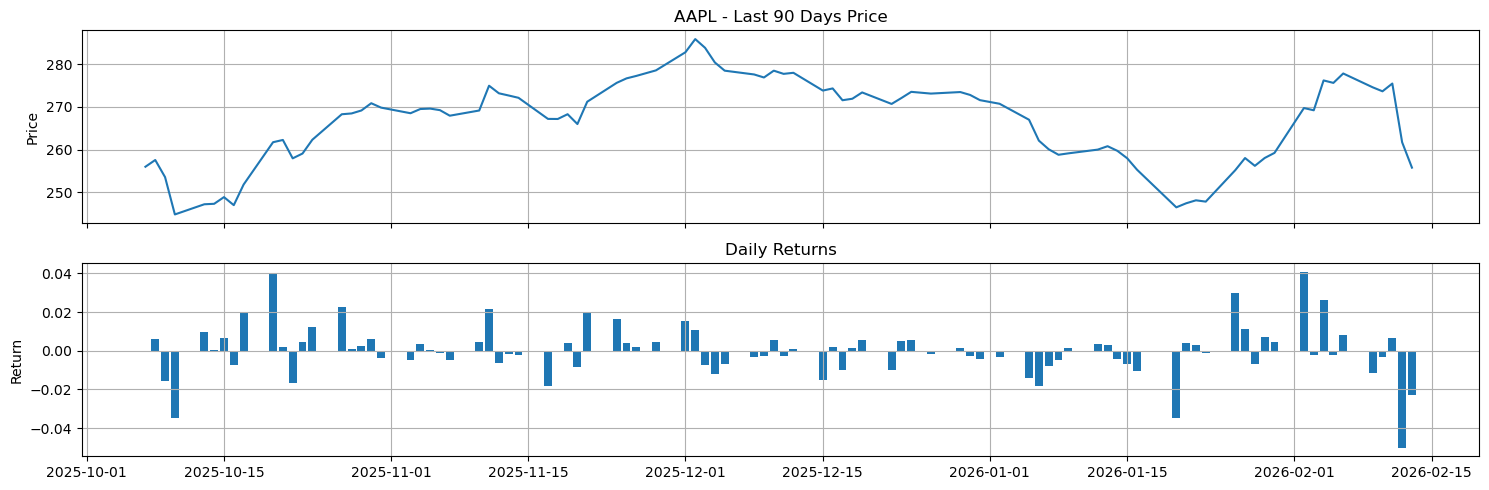

In [62]:
ticker = "AAPL"   # Change to any stock ticker
period = "90d"    # Last 90 days
interval = "1d"

# -----------------------------
# Download Data
# -----------------------------
data = yf.download(ticker, period=period, interval=interval)

# Ensure we only use the Close column
data = data[['Close']]

# -----------------------------
# Calculate Daily Returns
# -----------------------------
data['Returns'] = data['Close'].pct_change()

# -----------------------------
# Plotting
# -----------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(15, 5),
    sharex=True,
    gridspec_kw={'height_ratios': [1, 1]}
)

# --- Price Line Chart ---
ax1.plot(data.index, data['Close'])
ax1.set_title(f"{ticker} - Last 90 Days Price")
ax1.set_ylabel("Price")
ax1.grid(True)

# --- Returns Bar Chart ---
ax2.bar(data.index, data['Returns'])
ax2.set_title("Daily Returns")
ax2.set_ylabel("Return")
ax2.grid(True)

plt.tight_layout()
plt.show()

We can actually interpret the returns as a wave in itself. To do this we use a technique called interprative splines to create a wave that goes through all the known return data and creates a wave inbetween. This is demonstrated below. 

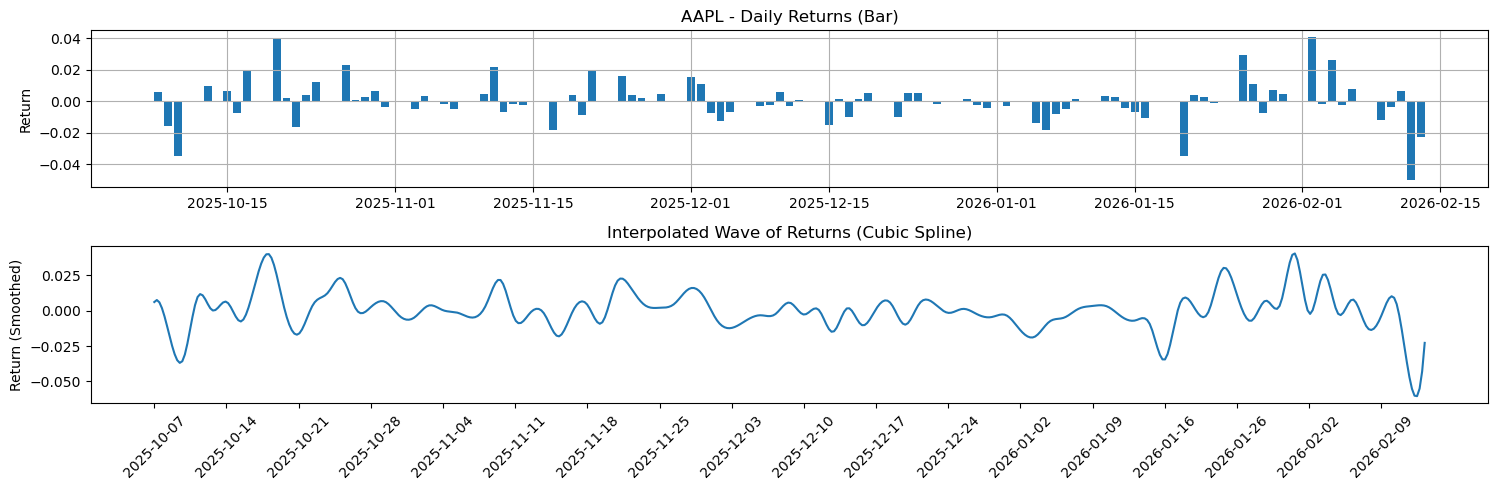

In [61]:
# Convert datetime index to numeric for interpolation
x = np.arange(len(data.dropna()))
y = data['Returns'].dropna().values

# Create smooth x-axis
x_smooth = np.linspace(x.min(), x.max(), 500)

# Cubic spline interpolation
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

# -----------------------------
# Plotting
# -----------------------------
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(15, 5),
    sharex=False,
    gridspec_kw={'height_ratios': [2, 2]}
)

# --- Bar Chart of Returns ---
ax1.bar(data.index, data['Returns'])
ax1.set_title(f"{ticker} - Daily Returns (Bar)")
ax1.set_ylabel("Return")
ax1.grid(True)

# --- Interpolated Wave Plot ---
ax2.plot(x_smooth, y_smooth)
ax2.set_title("Interpolated Wave of Returns (Cubic Spline)")
ax2.set_ylabel("Return (Smoothed)")
ax2.grid(False)

# Adjust x-axis labels for smooth plot
step = 5
ax2.set_xticks(x[::step])
ax2.set_xticklabels(data.index[::step].strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()

Now with a wave that represents our returns over time, we use the Fourier Transform to get the behavior of the returns in terms of frequencies and magnitudes. 

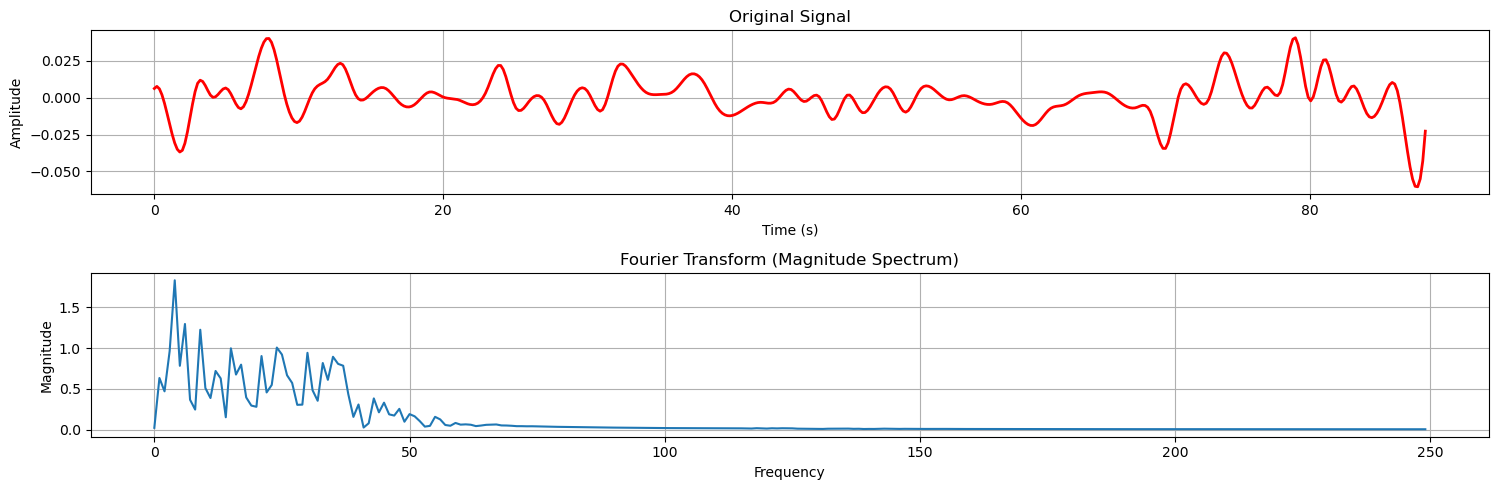

In [65]:
# ----- 2. Compute Fourier Transform -----
fft_vals = np.fft.fft( y_smooth)
fft_freqs = np.fft.fftfreq(len(y_smooth), 1/500)

# Only keep positive frequencies
positive_freqs = fft_freqs[:len(fft_freqs)//2]
positive_magnitude = np.abs(fft_vals[:len(fft_vals)//2])

# ----- 3. Plot stacked graphs -----
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

# Original signal
ax[0].plot(x_smooth,  y_smooth, color="red", linewidth=2)
ax[0].set_title("Original Signal")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

# Fourier Transform (magnitude spectrum)
ax[1].plot(positive_freqs, positive_magnitude)
ax[1].set_title("Fourier Transform (Magnitude Spectrum)")
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Magnitude")
ax[1].grid(True)

plt.tight_layout()
plt.show()

Now for our neural network what we can do is take frequency bands. This is like taking the average of the range between 0 and 5, then 5 to 10, and so on. Basically, splitting the frequency domain of the Fourier transform into equally-spaced segments and taking the mean of these segments. What we then can so is normalize these frequency bands. One way of doing this is by dividing our observed frequency band by the maximum number that frequency band as seen over all historical data. What this does is two things. First is that it reduces our search space for our Neural Net making things more efficient. Secondly, the number will end up between 0 and 1 which is a number than can be interpretated as percentage of maximum historical value. This makes the number more interpretable. One final idea for things to possibly do for the Neural network is to remove the higher frequencies from the input. Higher frequencies move inredibly fast and therefore represent the jerky behavior observed in day to day returns. By removing the higher frequency bands we get the more stable long term behavior which theoretically has better explanatory value. The jerky behavior modeled by high frequencies is already included in our model as volatility. 